In [79]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from umap import UMAP

In [80]:
data = pd.read_csv('C:/Users/Dylan/exoplanet_unsupervised/Data/cleaned_processed_data/cleaned_exoplanets_copy.csv', header = 0)
#loading this dataset

In [81]:
#between the previous step and the next one, I filled in the blank cells by estimating the values for each planet 

In [82]:
data.shape

(5470, 10)

In [83]:
data.isnull().sum()

pl_name         0
pl_orbper       4
pl_orbsmax      7
pl_radj        17
pl_bmassj      25
pl_dens        36
st_rad        229
st_mass         3
st_lum        224
pl_class        6
dtype: int64

In [84]:
dropped_column = data['pl_class'] #saving this column so I can add it later

In [85]:
data = data.drop(['st_rad', 'st_lum'], axis=1)

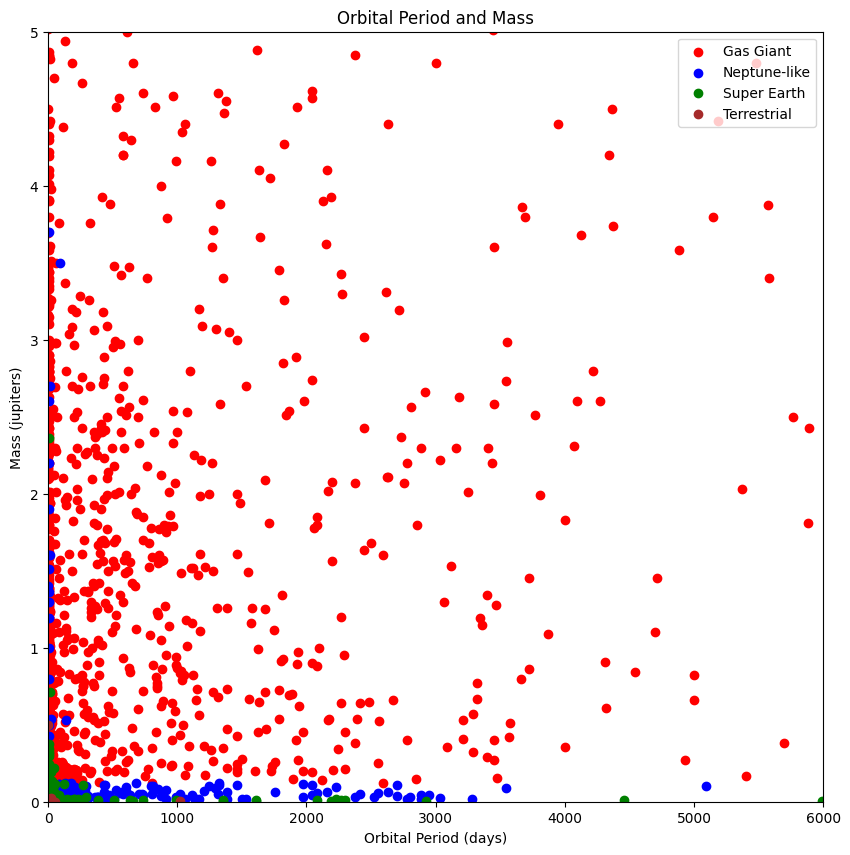

In [86]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_orbper'], subset['pl_bmassj'], label=class_, color=color)

plt.xlabel('Orbital Period (days)')
plt.ylabel('Mass (jupiters)')
plt.title('Orbital Period and Mass')
plt.xlim(0, 6000)  # Example x-axis range
plt.ylim(0, 5) 
plt.legend()
plt.show()

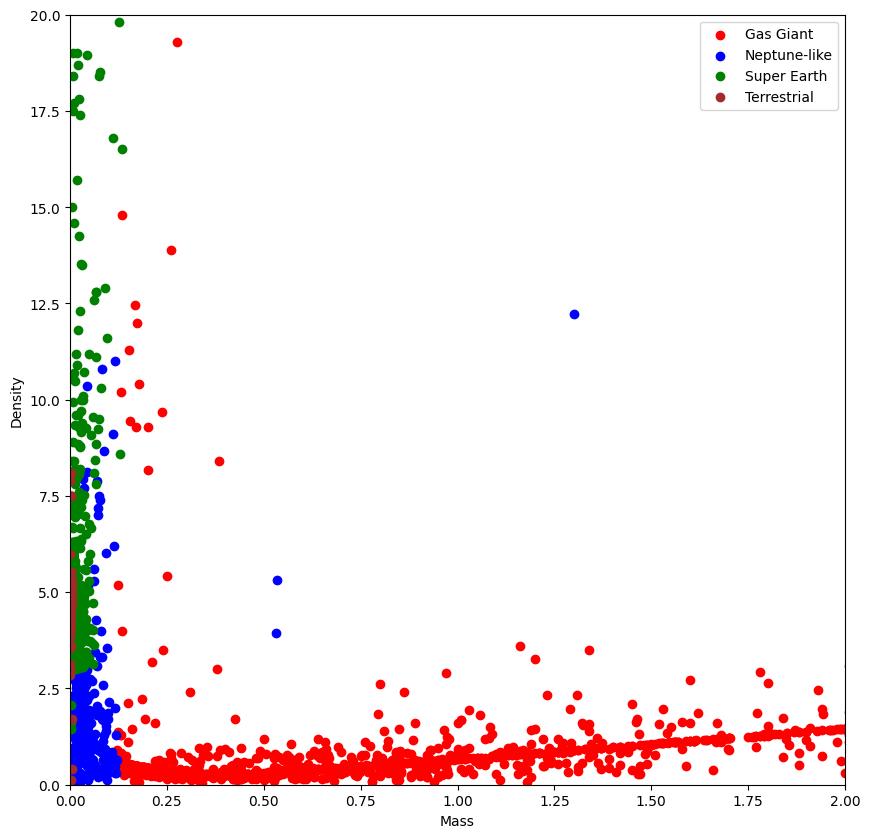

In [87]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_dens'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('')
plt.xlim(0, 2)  # Example x-axis range
plt.ylim(0, 20) 
plt.legend()
plt.show()

In [88]:
#there is a pretty decent correlation. The planets with higher mass are less dense. Whereas the planets with a lower mass are more dense. 

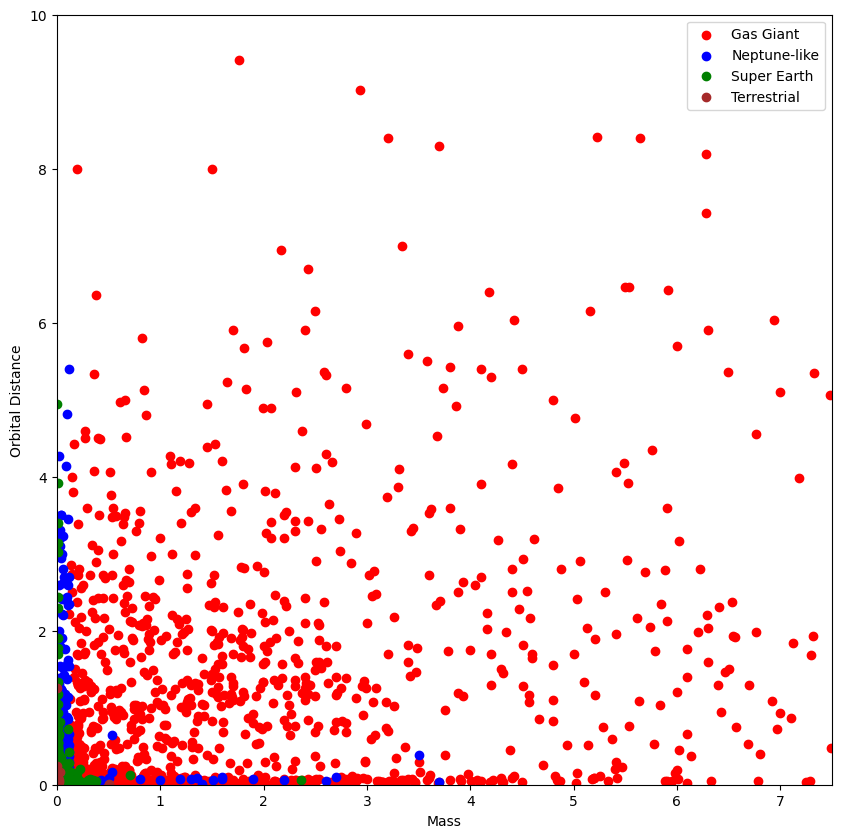

In [89]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_orbsmax'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Orbital Distance')
plt.title('')
plt.xlim(0,7.5)  # Example x-axis range
plt.ylim(0, 10) 
plt.legend()
plt.show()

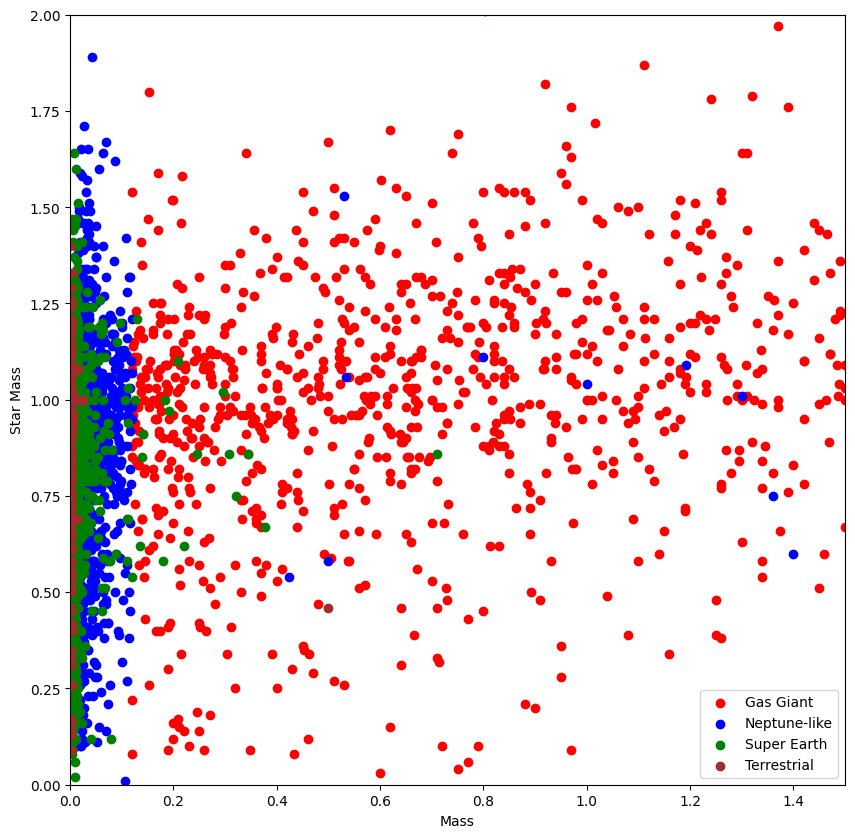

In [90]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['st_mass'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Star Mass')
plt.title('')
plt.xlim(0, 1.5)  # Example x-axis range
plt.ylim(0, 2) 
plt.legend()
plt.show()

In [91]:
#Planets with a higher mass do not necessarily have a larger star masss

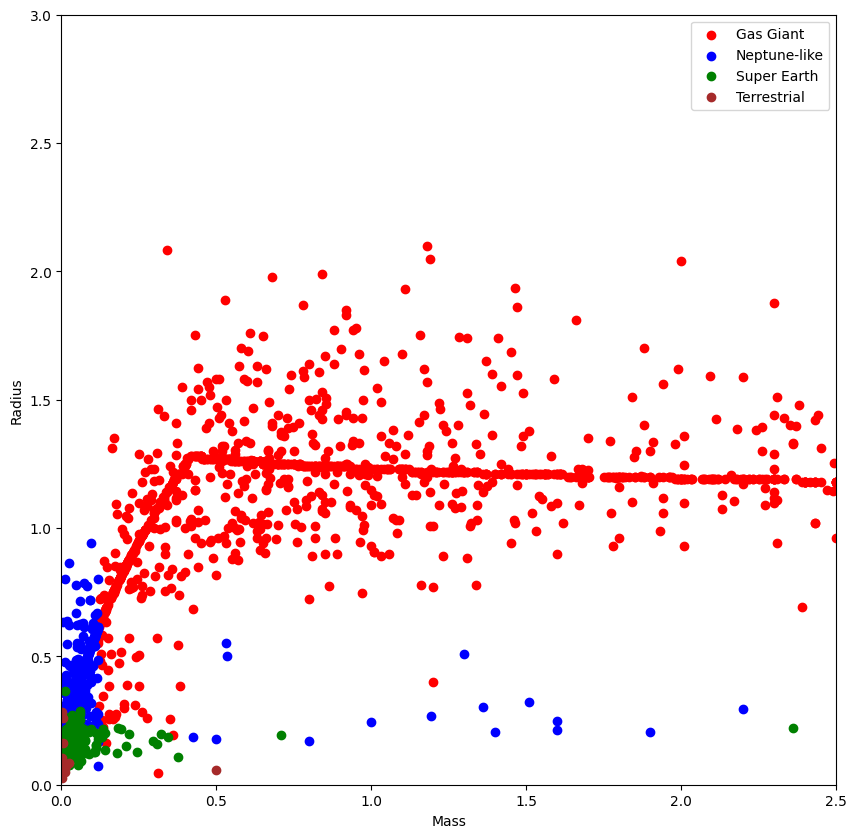

In [92]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Define a list of colors for each class
class_colors = {'Gas Giant': 'red', 'Neptune-like': 'blue', 'Super Earth': 'green', 'Terrestrial': 'brown'}

for class_, color in class_colors.items():
    subset = data[data['pl_class'] == class_]
    plt.scatter(subset['pl_bmassj'], subset['pl_radj'], label=class_, color=color)

plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('')
plt.ylim(0, 3)  # Example x-axis range
plt.xlim(0, 2.5) 
plt.legend()
plt.show()

In [93]:
data = data.drop(['pl_orbsmax','pl_class','st_mass', 'pl_radj'], axis=1)

In [94]:
data.isnull().sum()

pl_name       0
pl_orbper     4
pl_bmassj    25
pl_dens      36
dtype: int64

In [95]:
data = data.dropna(inplace=False)
#dropping the rows with null values as those are the planets we simply do not have enough data on

In [96]:
print(data.shape)
data.isnull().sum()
#no null values!

(5432, 4)


pl_name      0
pl_orbper    0
pl_bmassj    0
pl_dens      0
dtype: int64

In [97]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['pl_orbper','pl_bmassj','pl_dens']] = scaler.fit_transform(data[['pl_orbper','pl_bmassj','pl_dens']])

In [98]:
data

,pl_name,pl_orbper,pl_bmassj,pl_dens
0,11 Com b,8.107943e-07,0.025798,0.004473
1,11 UMi b,1.283904e-06,0.019601,0.003230
2,14 And b,4.620629e-07,0.006383,0.000908
3,14 Her b,4.390418e-06,0.010709,0.001642
4,16 Cyg B b,1.986093e-06,0.002367,0.000289
...,...,...,...,...
5465,ups And b,1.125952e-08,0.000914,0.000096
5466,ups And c,5.999186e-07,0.018590,0.003066
5467,ups And d,3.175048e-06,0.013630,0.002144
5468,ups Leo b,9.579833e-07,0.000678,0.000066


In [99]:
from sklearn.utils import shuffle

# Shuffle the dataset
data = shuffle(data, random_state=42)

In [100]:
column_to_omit = 'pl_name'

# Drop the specified column while keeping the DataFrame structure
data_without_column = data.drop(columns=[column_to_omit])

# Initialize UMAP with desired parameters
umap = UMAP(n_components=2, random_state=42)

# Apply UMAP dimensionality reduction
umap_result = umap.fit_transform(data_without_column)

# Create a new DataFrame with UMAP results and the original index
umap_df = pd.DataFrame(umap_result, columns=['UMAP Dimension 1', 'UMAP Dimension 2'], index=data.index)

In [101]:
from sklearn.cluster import KMeans
#initialize k-means clustering

K = 3

kmeans = KMeans(n_clusters=K, n_init = 10000)
kmeans.fit(umap_df)

cluster_assignments = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

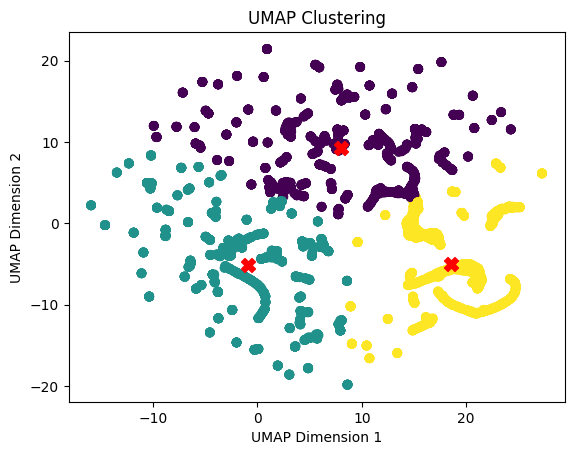

In [102]:
data['cluster_label'] = cluster_assignments
#visualize the clustering

plt.scatter(umap_df['UMAP Dimension 1'], umap_df['UMAP Dimension 2'], c=cluster_assignments, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Clustering')
plt.show()

In [103]:
unique_labels, label_counts = np.unique(cluster_assignments, return_counts=True)

# count the number of planets per column
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 1955 data points
Cluster 1: 1692 data points
Cluster 2: 1785 data points


In [104]:
data['Class'] = dropped_column #remember that column I saved? I add the classes now

In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Actual_Labels_Encoded'] = label_encoder.fit_transform(data['Class'])

actual_labels_encoded = data['Actual_Labels_Encoded']
cluster_labels = data['cluster_label']

In [106]:
pd.set_option('display.max_rows', 10)
data

,pl_name,pl_orbper,pl_bmassj,pl_dens,cluster_label,Class,Actual_Labels_Encoded
5292,WASP-177 b,7.415462e-09,0.000675,0.000033,2,Gas Giant,0
4982,TOI-1694 c,9.679336e-07,0.001396,0.000157,2,Gas Giant,0
2159,Kepler-1166 b,8.246264e-08,0.000015,0.000927,1,Super Earth,2
501,HD 108341 b,2.808232e-06,0.002992,0.000385,2,Gas Giant,0
4490,Kepler-858 b,1.891674e-07,0.000088,0.000228,0,Neptune-like,1
...,...,...,...,...,...,...,...
3788,Kepler-380 c,1.875447e-08,0.000009,0.001346,1,Super Earth,2
5228,WASP-107 b,1.400689e-08,0.000128,0.000024,0,Neptune-like,1
5263,WASP-148 b,2.167438e-08,0.000382,0.000188,2,Gas Giant,0
5428,bet Pic b,2.143637e-05,0.015597,0.000753,2,Gas Giant,0


In [107]:
dictionary = {0: '1', 1: '2', 2: '0'} #dictionary to transfer the classes as they are encoded differently 
data['new_mapped_label'] = data['cluster_label'].map(dictionary) #integrate the dictionary 

In [108]:
print(data.dtypes) #check data types

pl_name                   object
pl_orbper                float64
pl_bmassj                float64
pl_dens                  float64
cluster_label              int32
Class                     object
Actual_Labels_Encoded      int32
new_mapped_label          object
dtype: object


In [109]:
matches = 0
data['new_mapped_label'] = data['new_mapped_label'].astype('int32') #the new column has a different datatype which would mess up label comparison so we change its data type

# Loop through the DataFrame and compare values
for index, row in data.iterrows():
    encoded_value_1 = row['Actual_Labels_Encoded']
    encoded_value_2 = row['new_mapped_label']
    
    if encoded_value_1 == encoded_value_2: #if the class labels match, it adds matches by one
        matches += 1
        
    if encoded_value_1 == 3 and encoded_value_2 == 2: #any planets labeled as terrestrial but classified as super earth are considered correct as that group is rocky planets
        matches +=1
    
print(matches/(data.shape[0])) #correct classifications by the total number of planets

0.823821796759941


In [ ]:
#82% is really good considering the AI has no labels!

In [287]:
import joblib

# Save the model
joblib.dump(kmeans, 'one_clustering.pkl')

['one_clustering.pkl']

In [289]:
loaded_model = joblib.load('C:/Users/Dylan/exoplanet_unsupervised/Models/one_clustering.pkl')